In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

plt.jet()
%matplotlib inline

In [2]:
# available in mat: 'Udn3norm','Vdn3norm','Gdn','x','y','actID','XACT','YACT','nodeID'
mat = scipy.io.loadmat('data/M2_Udn3norm.mat')
Udn3norm = mat['Udn3norm']
Vdn3norm = mat['Vdn3norm']
bx = mat['x']
by = mat['y']
nodeID = mat['nodeID']

actID = mat['actID']
xact = mat['XACT']
yact = mat['YACT']
c = mat['c'] #this is the cosine of the angle between optical axis and surface normal

In [3]:
# actID as came out of FEA are of order 1e7, no need to be that large
id = np.mod(actID, 1000)
actID = (actID - id)/1000+id

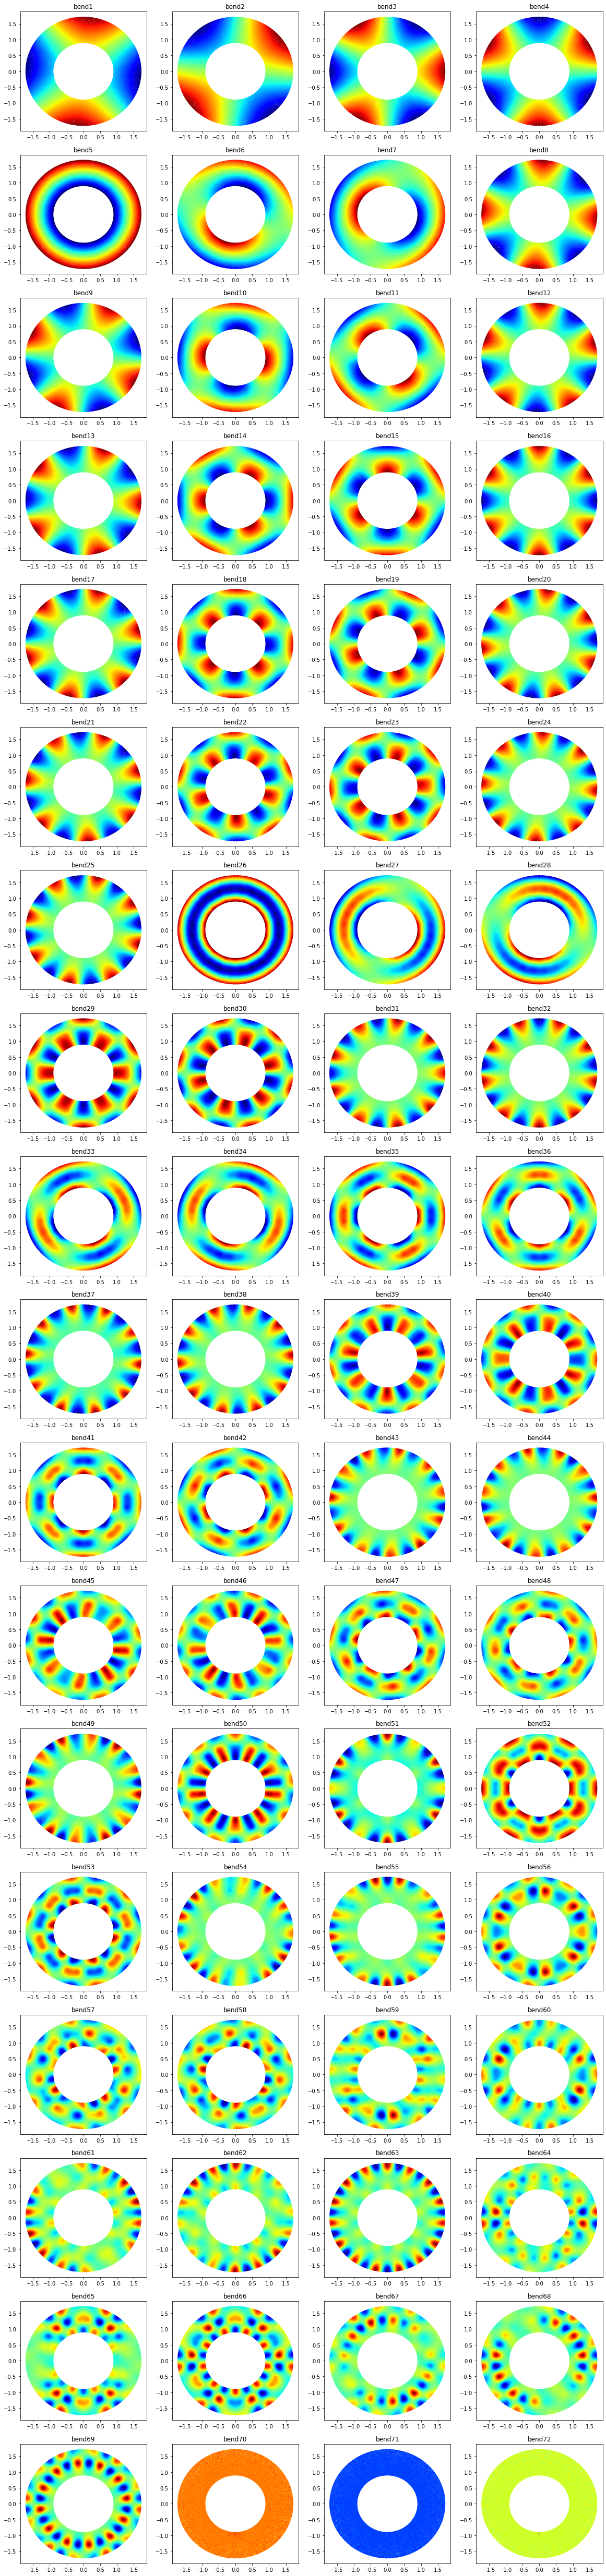

In [4]:
bx1 = np.squeeze(bx)
by1 = np.squeeze(by)
fig, ax = plt.subplots(18,4,figsize=(20,18*5))
i = 0
for modeID in range(1,73):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1

    img = ax[irow][icol].scatter(bx1,by1,1, Udn3norm[:,modeID-1])
    ax[irow][icol].set_title('bend%d'%modeID)

In [5]:
#mode shapes in surface sag
Urt3norm = Udn3norm/c

In [6]:
# we use 1-17, and 26, 27, 28
def swapCols(a, c1, c2):
    '''swap columns c1 and c2
    c1 and c2 are indices that start from 1.
    '''
    tmp = a[:,c1-1].copy()
    a[:,c1-1] = a[:,c2-1]
    a[:,c2-1] = tmp
    return a

#mode shapes are same as FEA
bb = Udn3norm.copy()
bb = swapCols(bb, 18, 26)
bb = swapCols(bb, 19, 27)
bb = swapCols(bb, 20, 28)
aa = np.hstack([nodeID, bx, by, bb])
np.savetxt('data/M2_1um_72_grid.txt', aa, fmt = '%.6e')

bb = Vdn3norm.copy()
bb = swapCols(bb, 18, 26)
bb = swapCols(bb, 19, 27)
bb = swapCols(bb, 20, 28)
aa = np.hstack([actID.reshape(-1,1), xact.reshape(-1,1), yact.reshape(-1,1), bb])
np.savetxt('data/M2_1um_72_force.txt', aa, fmt = '%.6e')

bb = Urt3norm.copy()
bb = swapCols(bb, 18, 26)
bb = swapCols(bb, 19, 27)
bb = swapCols(bb, 20, 28)
aa = np.hstack([nodeID, bx, by, bb])
np.savetxt('data/M2_1um_72_sag.txt', aa, fmt = '%.6e')

## plot the reordered bending modes

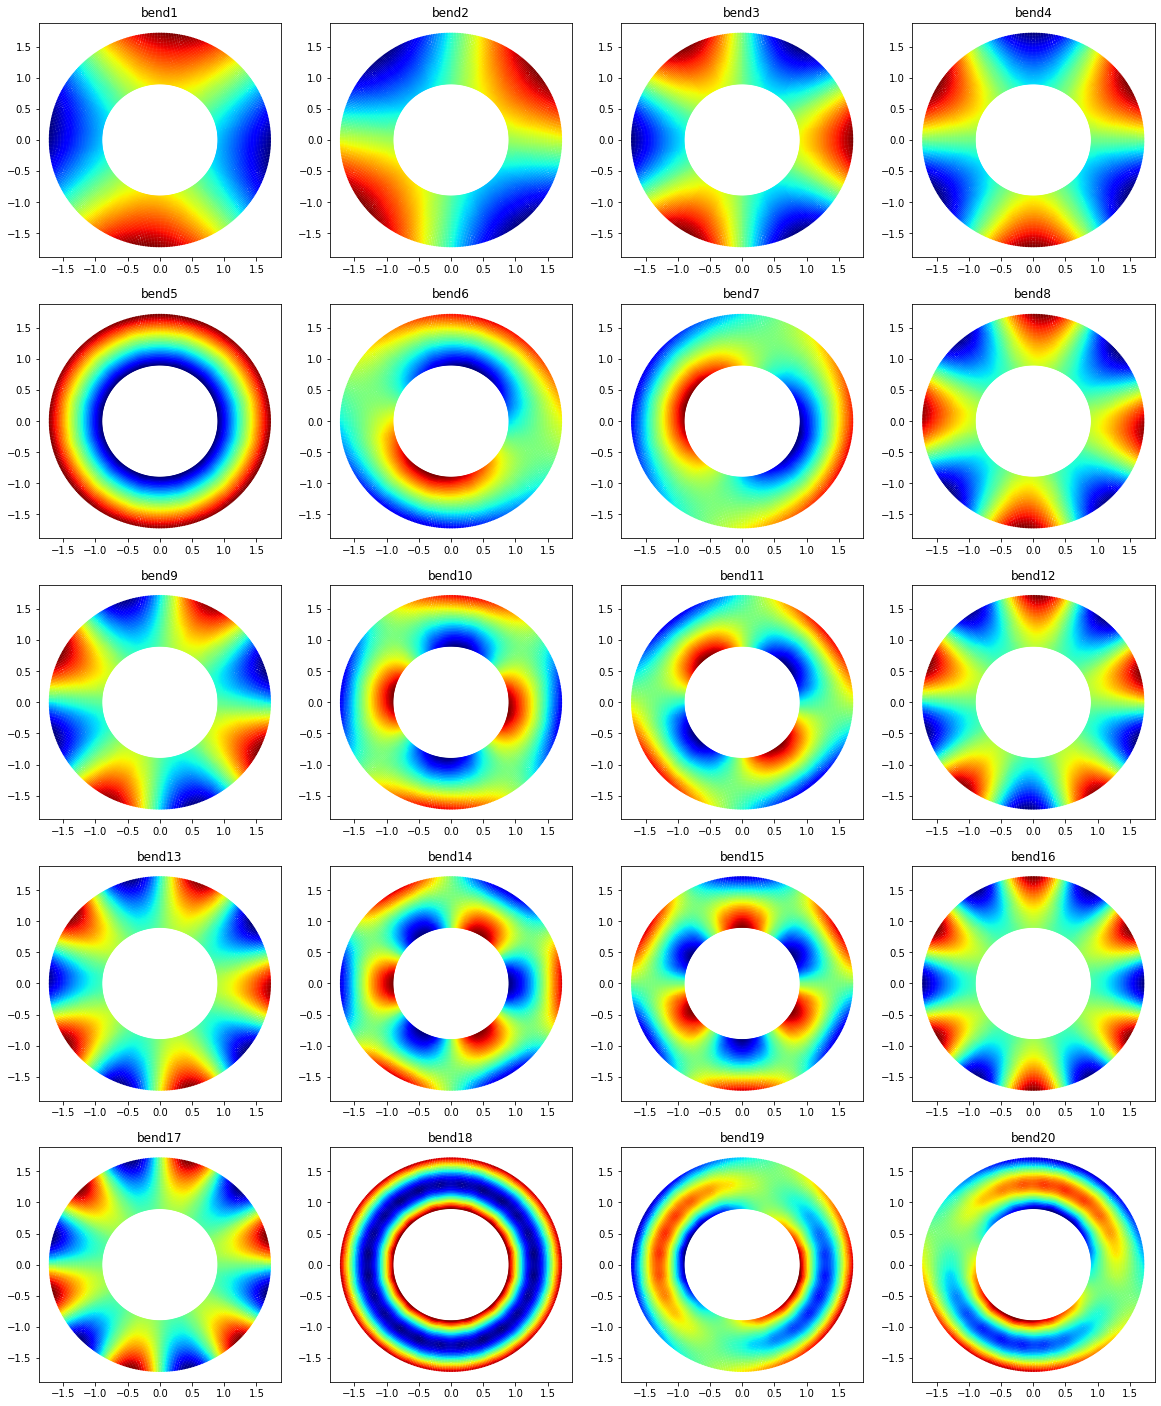

In [7]:
bb = Udn3norm.copy()
bb = swapCols(bb, 18, 26)
bb = swapCols(bb, 19, 27)
bb = swapCols(bb, 20, 28)

bx1 = np.squeeze(bx)
by1 = np.squeeze(by)
fig, ax = plt.subplots(5,4,figsize=(20,5*5))
i = 0
for modeID in range(1,21):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1

    img = ax[irow][icol].scatter(bx1,by1,1, bb[:,modeID-1])
    ax[irow][icol].set_title('bend%d'%modeID)